## Pandas

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

Команда %matplotlib inline указывает, что график необходимо построить  в той же оболочке Jupyter, но теперь он выводится как обычная картинка. Данный способ удобен тем, что позволяет проводить  много экспериментов в рамках одного окна (web-страницы).

### NumPy

### Структуры данных Pandas
#### Series
- Series - одномерная структура данных, которая может хранить в себе данные одного типа. Series напоминает словарь, так как позволяет получать элементы по индексу, который может быть не только целочисленного типа. Свойства Series:
    - Series.index - индексы элементов
    - Series.values - значения элементов
    
#### DataFrame
- DataFrame - двумерная структура данных, которая может хранить в себе данные разных типов. По сути, DataFrame это матрица, где столбцами являются признаки, а строками объекты. Каждая колонка DataFrame имеет тип Series. DataFrame имеет много методов и свойств для аналитики, получения срезов и преобразования данных. Вот некоторые из них:
    - DataFrame.info() - получение общей информации по датафрейму
    - DataFrame.dtypes - типы колонок
    - DataFrame.columns - имена колонок
    
Для того, чтобы считать данные из файла в DataFrame, в библиотеке предусмотрено множество функций. Большинство из них начинаются с префикса 'read' - например:
   - pandas.read_csv - читает данные из файла с расширением .csv
   - pandas.read_excel - читает данные из файла .xlsx
Эти методы имеют много параметров, начиная от имени файла и заканчивая кодировкой и разделителем.

Более подробно с методами DataFrame можно ознакомиться в документации к Pandas, ссылка на которую приводится в разделе "Полезные ссылки".

#### Рассматрим датасет с  данными из нефтяной отрасли: дебит жидкости после ГТМ (геолого-технического мероприятия)

#### Описание  признаков
Признак | Описание
--------| -------------
Dnytr | диаметр трубы
H_din |   Динамический уровень
Q_OIS |   Дебит жидкости
NomMoschn |	Номинальная мощность
Hperf |	Глубина перфораций
NomNapor	| Номинальный напор
Water_cut |	Обводненность
NomPodacha	| Номинальная подача
Dnkt |	Диаметр НКТ
H_sp	| Глубина спуска
P_plst	| Пластовое давление
Hvd	| Глубина верхних дыр перфораций
Extend_Hvd	| Удлинение верхних дыр перфораций
PlNeft |	Плотность нефти
VyazkNeft	| Вязкость нефти
SumTolshin	| Сумма нефтенасыщенных толщин
P_zatr	| Затрубное давление
PlVody |	Плотность воды
Pnas	| Давление насыщения
Inject_0,1,2,3	| Приемистость ближайших нагнетательных скважин
BHP	| Забойное давление
State	| Состояние скважины (работает, не работает)
IDN_type |	Тип ГТМ (ИДН или ППР)
NalichSep |	Наличие сепаратора
Formation_lbl |	Метка пласта
state_age	| Возраст состояние
Date |	Дата
Start_date	| Дата начала ГТМ
Well_ID|	ID скважины
id	ID| ГТМ
VNR|	Признак выхода на режим
Date_VNR|	Дата выхода на режим
GTM_type_lbl|	Метка типа ГТМ 

#### Описание задачи
На основе  данных построить модель прогнозирования дебита жидкости (признак Q_OIS) после геолого-технического мероприятия (ГТМ) – итенсификация добычи нефти (ИДН). 
Прогноз необходимо сделать на дату выхода скажины на режим (дата ВНР). Точка прогноза однозначно задается бинарным признаком VNR (точка прогноза – VNR=1).

Каждому событию ИДН предшествует своя история, однозначно определяемая признаком id. В тренировочном датасете contest_train_df.csv для каждого факта ИДН (признак id) известно значение дебита жидкости Q_OIS на дату ВНР (VNR=1).

Дополнительно  дана таблица со всеми типами ГТМ, проведенными на исследуемых скважинах.

In [3]:
# чтение данных из файла с расширением .csv
df = pd.read_csv('contest_train_df.csv')
# общая информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782441 entries, 0 to 2782440
Data columns (total 34 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Dnytr          float64
 1   H_din          float64
 2   Q_OIS          float64
 3   NomMoschn      float64
 4   Hperf          float64
 5   NomNapor       float64
 6   Water_cut      float64
 7   NomPodacha     float64
 8   Dnkt           float64
 9   H_sp           float64
 10  P_plst         float64
 11  Hvd            float64
 12  Extend_Hvd     float64
 13  PlNeft         float64
 14  VyazkNeft      float64
 15  SumTolshin     float64
 16  P_zatr         float64
 17  PlVody         float64
 18  Pnas           float64
 19  Inject_0       float64
 20  Inject_1       float64
 21  Inject_2       float64
 22  Inject_3       float64
 23  BHP            float64
 24  State          int64  
 25  IDN_type       int64  
 26  NalichSep      float64
 27  Formation_lbl  object 
 28  state_age      float64
 29  Date          

In [4]:
# Проверяем на пропуски. Многовато.

df.isna().any()

Dnytr             True
H_din             True
Q_OIS             True
NomMoschn         True
Hperf             True
NomNapor          True
Water_cut         True
NomPodacha        True
Dnkt              True
H_sp              True
P_plst            True
Hvd               True
Extend_Hvd        True
PlNeft            True
VyazkNeft         True
SumTolshin        True
P_zatr            True
PlVody            True
Pnas              True
Inject_0          True
Inject_1          True
Inject_2          True
Inject_3          True
BHP               True
State            False
IDN_type         False
NalichSep         True
Formation_lbl    False
state_age        False
Date             False
Start_date       False
Well_ID          False
id               False
VNR              False
dtype: bool

In [5]:
# Имя первого признака
df.columns

Index(['Dnytr', 'H_din', 'Q_OIS', 'NomMoschn', 'Hperf', 'NomNapor',
       'Water_cut', 'NomPodacha', 'Dnkt', 'H_sp', 'P_plst', 'Hvd',
       'Extend_Hvd', 'PlNeft', 'VyazkNeft', 'SumTolshin', 'P_zatr', 'PlVody',
       'Pnas', 'Inject_0', 'Inject_1', 'Inject_2', 'Inject_3', 'BHP', 'State',
       'IDN_type', 'NalichSep', 'Formation_lbl', 'state_age', 'Date',
       'Start_date', 'Well_ID', 'id', 'VNR'],
      dtype='object')

In [6]:
# Обращение к колонке DataFrame по имени
# слева - индекс, справа - значение
# возвращается тип Series
df['Dnkt']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
2782436    73.0
2782437    73.0
2782438    73.0
2782439    73.0
2782440    73.0
Name: Dnkt, Length: 2782441, dtype: float64

In [7]:
# Получение элемента Series по индексу
df['H_sp'].iloc[2]

2100.0

In [8]:
# Вопрос 1. Какое значение лежит в колонке Formation_lbl по индексу 297?

df["Formation_lbl"].iloc[297]

'23'

### Статистика по DataFrame и Series
Ещё несколько полезных функций для получения информации о данных в датафрейме:

- DataFrame.describe() - получение описательной статистики
- Series().value_counts - подсчёт поличества вхождений значений в Series
- Series.unique(), Series.nunique() - множество уникальных значений в Series и количество уникальных
- DataFrame.head() - первые несколько записей DataFrame
- Series.max(), Series.min() - максимальное и минимальное значения
- Series.mean(), Series.median() - среднее и медианное значения

In [9]:
# посмотрим на данные
# выведем первые 10 записей датасета
df.head(10)

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,...,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR
0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1487.0,...,0,1,NaN,"2,5",30.0,1965-01-16,1965-06-21,4473,30413,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1320.0,...,1,1,NaN,"24,26",31.0,1965-01-16,1965-03-12,3905,26087,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2100.0,...,1,1,NaN,38,131.0,1965-01-16,1965-06-29,8467,58863,0
3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,NaN,"45,46",28.0,1965-01-16,1965-05-05,8092,56313,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2321.0,...,1,1,NaN,"2,5",616.0,1965-01-16,1965-06-21,4136,27819,0
5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,NaN,45,52.0,1965-01-16,1965-06-04,8090,56302,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.0,...,1,1,NaN,23,169.0,1965-01-16,1965-06-12,769,4377,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2085.0,...,1,1,NaN,7,547.0,1965-01-16,1965-07-08,6908,46487,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,NaN,23,311.0,1965-01-16,1965-03-23,1210,6782,0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1620.0,...,1,1,NaN,23,374.0,1965-01-16,1965-03-23,1611,9600,0


In [10]:
# размер таблицы, возвращается кортеж (количество записей, количество столбцов)
df.shape

(2782441, 34)

In [11]:
# оценка данных в общем
# полученим статистику по датафрейму
df.describe()

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,...,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,state_age,Well_ID,id,VNR
count,2.684735e+06,172579.000000,1.302361e+06,2.617663e+06,2.656718e+06,2.659152e+06,1.060342e+06,2.664482e+06,2.680877e+06,2.765985e+06,...,1.648875e+06,1.551415e+06,545615.000000,2.782441e+06,2.782441e+06,2.685115e+06,2.782441e+06,2.782441e+06,2.782441e+06,2.782441e+06
mean,1.312891e+02,1963.347570,1.162965e+02,1.014737e+02,3.398602e+01,2.097440e+03,5.606606e+01,1.821768e+02,7.162893e+01,2.386648e+03,...,3.628271e+02,3.676090e+02,75.595258,9.086626e-01,4.507970e-01,4.974603e-01,3.924990e+02,4.024384e+03,2.720821e+04,5.614495e-03
std,8.370227e+00,582.045551,1.391846e+02,6.709455e+01,3.802164e+01,3.081066e+02,3.442464e+01,1.585073e+02,4.264539e+00,3.605204e+02,...,2.660894e+02,2.605912e+02,33.600845,2.880884e-01,4.975733e-01,4.999936e-01,3.533261e+02,2.404601e+03,1.693324e+04,7.471930e-02
min,8.900000e+01,0.000000,0.000000e+00,1.100000e+01,6.000000e-01,1.840000e+02,0.000000e+00,2.000000e-01,1.000000e+00,1.000000e+00,...,0.000000e+00,8.235294e-01,-66.150000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
25%,1.270000e+02,1651.000000,2.500000e+01,5.000000e+01,1.200000e+01,1.911000e+03,2.000000e+01,6.000000e+01,7.300000e+01,2.200000e+03,...,1.696774e+02,1.749333e+02,51.400000,1.000000e+00,0.000000e+00,0.000000e+00,1.320000e+02,2.009000e+03,1.278000e+04,0.000000e+00
50%,1.290000e+02,2080.000000,6.700000e+01,7.460000e+01,2.300000e+01,2.154000e+03,6.100000e+01,1.250000e+02,7.300000e+01,2.411000e+03,...,3.029032e+02,3.123871e+02,69.300000,1.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,3.911000e+03,2.613000e+04,0.000000e+00
75%,1.306000e+02,2380.000000,1.600000e+02,1.400000e+02,4.400000e+01,2.313000e+03,9.100000e+01,2.500000e+02,7.300000e+01,2.640000e+03,...,4.955161e+02,5.091935e+02,92.960000,1.000000e+00,1.000000e+00,1.000000e+00,5.500000e+02,5.717000e+03,3.931600e+04,0.000000e+00
max,2.230000e+02,3292.000000,1.630000e+03,6.600000e+02,5.530000e+02,3.738000e+03,9.990000e+01,1.325000e+03,1.140000e+02,3.481000e+03,...,4.277480e+03,2.246143e+03,320.720000,1.000000e+00,1.000000e+00,1.000000e+00,3.125000e+03,8.693000e+03,6.010900e+04,1.000000e+00


In [12]:
# если хочется посмотреть только на часть выбранных признаков
# полезно выделить их и заново сделать describe

df[['Q_OIS', #  признак интересует, потому что он целевой
   'VNR',   #  признак является важным идентифкатором
    'Water_cut' #  признак, связанный с жидкостью
   ]].describe()

,Q_OIS,VNR,Water_cut
count,1.302361e+06,2.782441e+06,1.060342e+06
mean,1.162965e+02,5.614495e-03,5.606606e+01
std,1.391846e+02,7.471930e-02,3.442464e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+01,0.000000e+00,2.000000e+01
50%,6.700000e+01,0.000000e+00,6.100000e+01
75%,1.600000e+02,0.000000e+00,9.100000e+01
max,1.630000e+03,1.000000e+00,9.990000e+01


In [13]:
# количество уникальных значений в признаке
df['VNR'].nunique()

2

In [14]:
# признак VNR бинарный - у него всего два уникальных значения
# убедимся, что эти два значения - 1 и 0
df['VNR'].value_counts()

0    2766819
1      15622
Name: VNR, dtype: int64

In [15]:
df_copy = df.copy()


In [16]:
# Вопрос 2. Сколько в датасете признаков, у которых всего 2 уникальных значения?

binars_collum = 0

for col in df.columns:
    if df[col].nunique() == 2:
        binars_collum += 1
        
print("Количество бинарных признаков: {}".format(binars_collum))

#переделать в лямбда-функцию

Количество бинарных признаков: 4


In [17]:
# Вопрос 3. Сколько уникальных значений в признаке Water_cut?

print("Количество уникальных значений в 'Water_cut': {} \n".
      format(df["Water_cut"].nunique()))

df['Water_cut'].value_counts() # Проверяем. Lenght 673. Сошлось

Количество уникальных значений в 'Water_cut': 673 



95.0    59603
96.0    51078
94.0    43813
93.0    35380
8.0     32477
        ...  
68.6        1
74.7        1
74.2        1
73.4        1
77.4        1
Name: Water_cut, Length: 673, dtype: int64

In [18]:
# Вопрос 4. Совпадает ли медиана и среднее у признака Extend_Hvd?


print("Медиана и среднее у признака 'Extend_Hvd': {} \n".
     format(df['Extend_Hvd'].mean() == df['Extend_Hvd'].median())) 

print('Медиана: {} \nСреднее: {} \n'.format(df['Extend_Hvd'].median() ,df['Extend_Hvd'].mean())) # Проверка.Сошлось

Медиана и среднее у признака 'Extend_Hvd': False 

Медиана: 162.3 
Среднее: 201.6127322585047 



In [19]:
# Вопрос 5. Какое максимальное значение у признака NomPodacha?

print("максимальное значение у признака 'NomPodacha': {}\n".
     format(df['NomPodacha'].max()))

df['NomPodacha'].describe() # Проверка. Сошлось.

максимальное значение у признака 'NomPodacha': 1325.0



count    2.664482e+06
mean     1.821768e+02
std      1.585073e+02
min      2.000000e-01
25%      6.000000e+01
50%      1.250000e+02
75%      2.500000e+02
max      1.325000e+03
Name: NomPodacha, dtype: float64

### Преобразование данных

##### Пропуски
Пропуски - отсутствующие значения в данных. С пропусками в данных можно бороться несколькими способами: заполнять их, или удалять объекты с пропусками. Если пропусков немного, то удаление объектов с пропусками может быть приемлимо, однако во многих случаях пропуски предпочтительнее заполнить, чтобы не потерять нужную информацию.
Pandas предоставляет несколько методов для работы с пропусками:
- Series.isna() - возвращает True для каждого пропуска
- Series.dropna() - удаляет все пропуски
- Series.fillna() - заполняет пропуски

##### Дубликаты
Дубликаты - повторяющиеся значения в данных. Дубликаты вредны: они создают неверное представление о данных (распределениях) и часто являются причиной ошибок (в данных и в процессе их обработки).
Для работы с дубликатами в Pandas:
- DataFrame.drop_duplicates() - удаляет все дублирующиеся значения

In [20]:
# так как признак VNR оказался бинарным, преобразуем его к нужному типу
df['VNR'] = df['VNR'].astype(bool)

In [21]:
df['VNR']

0          False
1          False
2          False
3          False
4          False
           ...  
2782436     True
2782437     True
2782438     True
2782439     True
2782440     True
Name: VNR, Length: 2782441, dtype: bool

In [22]:
# в выводе первых строк датасета было видно очень много пропусков (NaN)
# а сколько их точно?
# количество пропусков по всем признакам (колонкам)
# df.count() - количество заполненных по признакам (колонкам)
for col in df.columns:
    print('Признак = {:<13}: количество пропусков = {}'.format(col, df[col].isna().sum()))

Признак = Dnytr        : количество пропусков = 97706
Признак = H_din        : количество пропусков = 2609862
Признак = Q_OIS        : количество пропусков = 1480080
Признак = NomMoschn    : количество пропусков = 164778
Признак = Hperf        : количество пропусков = 125723
Признак = NomNapor     : количество пропусков = 123289
Признак = Water_cut    : количество пропусков = 1722099
Признак = NomPodacha   : количество пропусков = 117959
Признак = Dnkt         : количество пропусков = 101564
Признак = H_sp         : количество пропусков = 16456
Признак = P_plst       : количество пропусков = 99888
Признак = Hvd          : количество пропусков = 98201
Признак = Extend_Hvd   : количество пропусков = 98300
Признак = PlNeft       : количество пропусков = 97807
Признак = VyazkNeft    : количество пропусков = 141739
Признак = SumTolshin   : количество пропусков = 157177
Признак = P_zatr       : количество пропусков = 2609862
Признак = PlVody       : количество пропусков = 97807
Признак = Pna

In [23]:
# посмотрим, сколько останется данных
# если просто убрать все объекты (строки) в которых есть хотя бы один пропуск:
df.dropna().shape

(32566, 34)

In [24]:
# если убрать все объекты с пропусками, то мы теряем очень много данных
# проверим, есть ли строки, в которых пропущены воообще все значения?
df.dropna(how='all').shape[0] != df.shape[0]

False

In [25]:
# абсолютно пустых строк в датасете нет, значит просто убрать пропуски мы не можем
# лучше всего будет заполнить пропуски средним, но так как датасет довольно большой,
# сделаем это после группировки и создания агрегатов
# чтобы узнать, сколько всего будет уникальных скважин (а значит и строк в сгруппированном датасете) 
# вызовем метод nunique для признака Well_ID
df['Well_ID'].nunique()

7288

In [26]:
# Вопрос 6. Каков процент (%) пропусков в колонке NomNapor? Округлите ответ до двух знаков после запятой.

print("Процент пропусков в колонке 'NomNapor': {:2%}".
     format((
         df["NomNapor"].isna().sum()/len(df["NomNapor"])
           )))


Процент пропусков в колонке 'NomNapor': 4.430965%


In [27]:
print(len(df)) # всего данных


2782441


In [28]:
# Вопрос 7. Во сколько раз уменьшится размер датафрейма если сделать drop_duplicates по колонкам 'Dnkt','Dnytr'?
# Округлите ответ до целых.


# drop_duplicates - если данные в строках совпадают - удаляем строку.

df_cp = df.copy()

dupl_Dnkt = len(df_cp.Dnkt.drop_duplicates())
dupl_Dnytr = len(df_cp.Dnytr.drop_duplicates())
print('Dnkt: {}'.format(len(df_cp)/dupl_Dnkt))
print('Dnytr: {}'.format(len(df_cp)/dupl_Dnytr))

print('\nAnswer: {}'.format(len(df_cp)/(dupl_Dnkt + dupl_Dnytr))) # answer, but right ?


#df_cp.drop_duplicates(subset=['Dnkt', 'Dnytr'], keep='last') - почему-то не работает.

Dnkt: 1661.1588059701492
Dnytr: 27278.833333333332

Answer: 1565.808103545301


In [29]:
# Вопрос 8. Изменится ли среднее значение признака NomNapor если заполнить в нём пропуски значением 0?

izm = {1:"изменится", 0:"не изменится"}
key = df["NomNapor"].mean() == df["NomNapor"].fillna(0).mean()
print(f"Среднее значения признака 'NomNapor' при заполнении NaN нулями {izm[key]}")

Среднее значения признака 'NomNapor' при заполнении NaN нулями не изменится


### Агрегация

#### Группировка и агрегация
В pandas для группировки данных реализован метод **DataFrame.groupby()**. Он возвращает сгруппированный по указанному признаку датафрейм, к которому можно применять различные функции-агрегаты: например, выделение суммы для группы, подсчёт внутри группы более сложных агрегатов.

#### Использование lambda и apply
В случае потребности в нестандартных агрегатах можно воспользоваться **lambda-функцией** - для датафрейма она будет принимать Series, а для Series ячейку массива. Применить lambda-функцию к датафрейму можно через **apply** - этот метод принимает на вход функцию и применяет её ко всем элементам датафрейма (или Series).

In [30]:
# посмотрим агрегаты по признакам state_age и Water_cut
df.aggregate({'state_age': ['max', 'mean'],
              'Water_cut': ['max', 'min']})

,state_age,Water_cut
max,3125.00000,99.9
mean,392.49903,NaN
min,NaN,0.0


In [31]:
# сгруппируем датафрейм по признаку Well_ID
df_grouped = df.groupby('Well_ID')
# выведем результат
df_grouped.head()

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,...,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR
0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1487.0,...,0,1,NaN,"2,5",30.0,1965-01-16,1965-06-21,4473,30413,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1320.0,...,1,1,NaN,"24,26",31.0,1965-01-16,1965-03-12,3905,26087,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2100.0,...,1,1,NaN,38,131.0,1965-01-16,1965-06-29,8467,58863,False
3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,NaN,"45,46",28.0,1965-01-16,1965-05-05,8092,56313,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2321.0,...,1,1,NaN,"2,5",616.0,1965-01-16,1965-06-21,4136,27819,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676542,130.6,NaN,NaN,58.0,17.00,2378.0,NaN,60.0,73.0,2480.0,...,1,0,0.0,35,1.0,1979-07-08,1979-12-25,7984,55726,False
2676581,127.0,NaN,NaN,63.0,259.06,1733.0,NaN,125.0,73.0,1860.0,...,1,1,1.0,23,229.0,1979-07-08,1979-12-27,1734,10455,False
2677146,130.6,NaN,NaN,58.0,22.00,2214.0,NaN,83.0,73.0,2791.0,...,1,0,0.0,35,71.0,1979-07-09,1979-12-24,7465,52512,False
2677717,129.0,NaN,27.0,40.0,51.00,2190.0,8.0,50.0,73.0,2652.0,...,1,0,1.0,"3,5",625.0,1979-07-09,1979-12-28,6200,42565,False


In [32]:
# теперь получим агрегаты из первого пункта по сгруппированному датафрему
df_grouped.aggregate({'state_age': ['max', 'mean'],
                      'Water_cut': ['max', 'min']})

state_age             Water_cut      
              max        mean       max   min
Well_ID                                      
0           711.0  711.000000      88.0  83.0
1          1047.0  802.336957      82.0  66.0
2           722.0  722.000000      81.0  78.0
3           698.0  635.500000      93.0  72.0
4          1168.0  732.134791      92.0  80.0
...           ...         ...       ...   ...
8689        285.0  234.416894      98.0  29.0
8690        200.0  111.486339      94.0  19.0
8691        371.0  228.047273      92.0  66.0
8692         76.0   76.000000      70.0  60.0
8693        177.0  177.000000      76.0  70.0

[7288 rows x 4 columns]

In [33]:
# сравним округлённые значения средних и медианы по сгруппированному датафрейму
df_grouped.aggregate({'state_age':lambda x: round(np.median(x))==round(np.mean(x))})

,state_age
Well_ID,
0,True
1,False
2,True
3,True
4,False
...,...
8689,False
8690,False
8691,False


In [34]:
# посмотрим, какова разница между максимумом и минимумом по признаку Water_cut
df_grouped['Water_cut'].apply(lambda x: x.max() - x.min())

Well_ID
0        5.0
1       16.0
2        3.0
3       21.0
4       12.0
        ... 
8689    69.0
8690    75.0
8691    26.0
8692    10.0
8693     6.0
Name: Water_cut, Length: 7288, dtype: float64

In [35]:
# Вопрос 9. У скольки объектов при группировке по Well_ID среднее и медиана по признаку state_age не равны?



k = (len(df_grouped["state_age"]) # Общее количество
     -
    int(df_grouped.aggregate({'state_age':lambda x: round(np.median(x))==round(np.mean(x))}).sum())) # Медиана и среднее равны
    
print(f"У {k} объектов медиана и среднее по признаку 'state_age' равны.")

У 3843 объектов медиана и среднее по признаку 'state_age' равны.


### Сводные таблицы и корреляция
#### Сводные таблицы.
В pandas для построения сводных таблиц реализован метод pivot_table() - он принимает признаки и функции, которые нужно применить к этим признака. Кроме прочего, ему надо передать колонку, которая будет являться идентификатором в результирующей сводной таблице.

#### Корреляция
Корреляция - мера линейной (монотонной) зависимости. В pandas расчёт коэффициента корреляции реализован в методе corr(). По умолчанию рассчитывается коэффициент корреляции Пирсона, он может принимать значения от -1 до 1, где абсолютное значение отвечает за силу взаимосвязи, а знак - за её направление.

In [36]:
df.pivot_table(values='Water_cut',
               index='Well_ID',
               aggfunc=['mean','max','min'])

,mean,max,min
,Water_cut,Water_cut,Water_cut
Well_ID,,,
0,85.625000,88.0,83.0
1,78.118577,82.0,66.0
2,80.108571,81.0,78.0
3,78.406542,93.0,72.0
4,84.833333,92.0,80.0
...,...,...,...
8689,65.560000,98.0,29.0
8690,29.545455,94.0,19.0


In [37]:
df.pivot_table(values=['Dnytr','Q_OIS'],
               index='VNR',
               aggfunc=['std','mean'])

std                    mean            
          Dnytr       Q_OIS       Dnytr       Q_OIS
VNR                                                
False  8.370178  138.416651  131.288967  115.336770
True   8.379097  174.948769  131.316803  195.350718

In [38]:
agg_df = df_grouped.aggregate({'Q_OIS': ['max', 'mean'],
                      'Water_cut': ['max', 'mean']})
agg_df.corr()

Q_OIS           Water_cut          
                     max      mean       max      mean
Q_OIS     max   1.000000  0.893742  0.530348  0.580629
          mean  0.893742  1.000000  0.484103  0.552280
Water_cut max   0.530348  0.484103  1.000000  0.924370
          mean  0.580629  0.552280  0.924370  1.000000

In [39]:
# Вопрос 10. С помощью функции aggregate найдите максимум, минимум, медиану по признакам
#            Q_OIS, Water_cut, NomMoschn, P_plst для каждой скважины (по датафрейму, сгруппированному по Well_ID).
#            Посчитайте коэффициент корреляции Пирсона для этих агрегатов.
#            Есть ли среди этих агрегатов такие, коэффициент корреляции у которых больше 0.8? 

# код тут

train_agg_df = df_grouped.aggregate({
    "Q_OIS": ['max','min','median'],
    "Water_cut": ['max','min','median'],
    "NomMoschn": ['max','min','median'],
    "P_plst": ['max','min','median']
    
})

table = train_agg_df.corr(method='pearson')
table



Q_OIS                     Water_cut                      \
                       max       min    median       max       min    median   
Q_OIS     max     1.000000 -0.002539  0.833628  0.530348  0.505428  0.576248   
          min    -0.002539  1.000000  0.000110  0.004047  0.012187  0.007532   
          median  0.833628  0.000110  1.000000  0.463082  0.493683  0.520689   
Water_cut max     0.530348  0.004047  0.463082  1.000000  0.741859  0.908865   
          min     0.505428  0.012187  0.493683  0.741859  1.000000  0.864148   
          median  0.576248  0.007532  0.520689  0.908865  0.864148  1.000000   
NomMoschn max     0.806068 -0.005863  0.752118  0.409845  0.355815  0.435416   
          min     0.637487  0.002769  0.711181  0.307717  0.398733  0.383364   
          median  0.774482 -0.001916  0.783418  0.384124  0.407151  0.442378   
P_plst    max    -0.343996 -0.005528 -0.352332 -0.365074 -0.492744 -0.438068   
          min    -0.407702 -0.004133 -0.361787 -0.372213 -0.364785 -0.393627   
          median -0.395360 -0.008255 -0.371614 -0.374329 -0.439168 -0.424646   

                 NomMoschn                        P_plst                      
                       max       min    median       max       min    median  
Q_OIS     max     0.806068  0.637487  0.774482 -0.343996 -0.407702 -0.395360  
          min    -0.005863  0.002769 -0.001916 -0.005528 -0.004133 -0.008255  
          median  0.752118  0.711181  0.783418 -0.352332 -0.361787 -0.371614  
Water_cut max     0.409845  0.307717  0.384124 -0.365074 -0.372213 -0.374329  
          min     0.355815  0.398733  0.407151 -0.492744 -0.364785 -0.439168  
          median  0.435416  0.383364  0.442378 -0.438068 -0.393627 -0.424646  
NomMoschn max     1.000000  0.725220  0.891022 -0.215784 -0.290738 -0.270159  
          min     0.725220  1.000000  0.854151 -0.237583 -0.186578 -0.214752  
          median  0.891022  0.854151  1.000000 -0.246304 -0.270486 -0.272372  
P_plst    max    -0.215784 -0.237583 -0.246304  1.000000  0.776625  0.885027  
          min    -0.290738 -0.186578 -0.270486  0.776625  1.000000  0.904148  
          median -0.270159 -0.214752 -0.272372  0.885027  0.904148  1.000000

In [40]:
table.shape # таблица 12x12

(12, 12)

In [41]:
table_list = list(table)

In [42]:
more_08 = False

for i in range(len(table)):
    for j in range(len(table)):
        if table.iloc[i][j] < 1 and table.iloc[i][j] > 0.8:
            more_08 = True
            break
        
        #            Есть ли среди этих агрегатов такие, коэффициент корреляции у которых больше 0.8? 

print(f'Наличие среди агрегатов такого агрегата, у которого коэффициент корреляции больше 0.8 - {more_08}')

Наличие среди агрегатов такого агрегата, у которого коэффициент корреляции больше 0.8 - True


### Встроенная визуализация

Для визуализации датафрейм имеет метод **plot()**. Главные параметры, которые он принимает, это названия признаков и вид графика, который нужно по этим признакам отрисовать.

<AxesSubplot:ylabel='Density'>

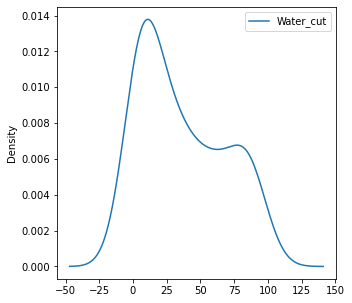

In [43]:
df.head(1000).plot(y='Water_cut',kind='kde',figsize=(5,5))

<AxesSubplot:ylabel='Frequency'>

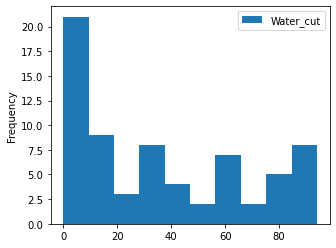

In [44]:
df.head(1000).plot(y='Water_cut',kind='hist',figsize=(5,4))

### Сохранение данных

In [45]:
df_res = df.head()

In [46]:
df_res.to_csv('filename.csv',index=False)

In [47]:
df_res.to_excel('filename.xlsx',index=False)

# Полезные ссылки:
- [Документация Pandas ](https://pandas.pydata.org/pandas-docs/stable/index.html)
- [Средние величины](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D0%B5_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D1%8B)
- [Видео Pandas на английском](https://www.youtube.com/watch?v=CmorAWRsCAw#action=share)


### Дополнительные материалы - теория и практика

#### Объединение датафреймов
Если данные берутся из нескольких источников, которые имеют общие идентификаторы, то объединить их можно методом **merge()**. Этот метод довольно гибкий - можно указывать имена колонок для объединения в каждом из датафремов, указывать тип объединения и др.

Тип объединения обычно выбирают в зависимости от конечной цели: если мы хотим сохранить обсолютно все объекты из обоих источников, даже при условии, что они будут почти не заполнены, можно выбрать тип "*outer*" .
Если у нас есть один наиболее доверенный источник, в качестве данных которого мы уверены, то можно присодинять данные из других источников с указанием типа "*left*" - в этом случае объекты, которых не будет в первом источнике, также не попадут и в конечный датафрейм.

Типу объединения соответствуют два понятия из теории множеста: **a.merge(b, how="inner")** - *пересечение множеств* a и b,
**a.merge(b, how="outer")** - *объединение множеств* a и b.

Ниже приведены несколько примеров объединения с помощью метода **merge()**.

In [48]:
# создадим два игрушечных датасета с разным набром объектов и разными колонками, чтобы увидеть
# как работают различные типы объединения
a = pd.DataFrame({'UID':[0,1,2,3,4,5],
                  'Должность':['Инженер','Инженер','Заместитель директора', 'Менеджер','Главный инженер','Менеджер'],
                  'Оклад (тыс.руб)':[35, 38, 95, 35, 58, 32]})

b = pd.DataFrame({'UID':[0,1,2,3,4],
                  'Возраст':[23,32,40,25,50],
                  'Образование':['Среднее специальное','Высшее','Высшее','Среднее специальное','К.т.н']})

In [49]:
a.merge(b, on='UID', how='outer')

,UID,Должность,Оклад (тыс.руб),Возраст,Образование
0,0,Инженер,35,23.0,Среднее специальное
1,1,Инженер,38,32.0,Высшее
2,2,Заместитель директора,95,40.0,Высшее
3,3,Менеджер,35,25.0,Среднее специальное
4,4,Главный инженер,58,50.0,К.т.н
5,5,Менеджер,32,NaN,NaN


In [50]:
a.merge(b, on='UID', how='inner')

,UID,Должность,Оклад (тыс.руб),Возраст,Образование
0,0,Инженер,35,23,Среднее специальное
1,1,Инженер,38,32,Высшее
2,2,Заместитель директора,95,40,Высшее
3,3,Менеджер,35,25,Среднее специальное
4,4,Главный инженер,58,50,К.т.н


In [51]:
# предположим, что мы хотим посмотреть размеры окладов в разрезе возраста и образования
# в этом случае outer тип для нас бесполезен - так как не принёсёт в данные нужной информации
df = a.merge(b, on='UID', how='inner')

In [52]:
# посмотрим на средние оклады людей до 35 (включительно) и после 35
round(df[df['Возраст'] <= 30]['Оклад (тыс.руб)'].mean(),2),round(df[df['Возраст'] > 30]['Оклад (тыс.руб)'].mean(),2)

(35.0, 63.67)

In [53]:
# теперь сгруппируем наш датафрейм по типу образования и посмотрим на статистику по окладу
df.groupby('Образование')['Оклад (тыс.руб)'].mean()

Образование
Высшее                 66.5
К.т.н                  58.0
Среднее специальное    35.0
Name: Оклад (тыс.руб), dtype: float64

In [54]:
# теперь предположим, что нам дали дополнительные данные по сотрудникам из филиалов компании
# мы должны присоединить их к нашему датасету и рассчитать интересующие показатели заново
a = pd.DataFrame({'UID':[101, 200, 202, 408, 501],
                  'Должность':['Инженер','Менеджер','Старший инженер','Инженер','Оператор поддержки'],
                  'Оклад (тыс.руб)':[38, 27, 45, 35, 20]})

b = pd.DataFrame({'UID':[101, 200, 202, 408, 501],
                  'Возраст':[37, 38, 45, 28, 21],
                  'Образование':['Высшее','Высшее','Высшее','Среднее специальное','Среднее']})

df_add = a.merge(b, on='UID', how='inner')

In [55]:
# объединим датафремы
df = pd.concat([df, df_add]) # метод concat принимает список из датафреймов, у которых должны быть одинаковые колонки

In [56]:
round(df[df['Возраст'] <= 30]['Оклад (тыс.руб)'].mean(),2),round(df[df['Возраст'] > 30]['Оклад (тыс.руб)'].mean(),2)

(31.25, 50.17)

In [57]:
df.groupby('Образование')['Оклад (тыс.руб)'].mean()

Образование
Высшее                 48.6
К.т.н                  58.0
Среднее                20.0
Среднее специальное    35.0
Name: Оклад (тыс.руб), dtype: float64

#### Оконные функции.
Для работы с рапсределёнными во времени данных в pandas существуют оконные функции - они позволяют вычислить агрегаты в рамках небольших временных периодов, так называемых "окон", которые можно сдвигать на заданный шаг для повторения рассчётов.
В pandas реализовано несколько методов для работы с распределёнными во времени данными:
- pandas.rolling() - позволяет произвести оконные вычисления с любой произвольной функцией в рамках заданного окна
- pandas.expanding() - позвояет произвести куммулятивные вычисления с любой произвольной функцией для заданного размера окна
- pandas.ewm() - позволяет "сгладить" данные, подробное описание можно прочесть в документации к pandas

In [58]:
# пусть для каждого сотрудника из предыдущего пункта необходимо проанализировать его предыдущую
# трудовую деятельность : длительность работы на каждом месте, рост дохода
a = pd.DataFrame({'UID':[1, 1, 2, 2, 2, 2, 408, 408, 501],
                 'Company_ID':[100, 304, 202, 35, 78, 23, 90, 23, 10],
                 'Дата начала работы':['2000-09-01',
                                       '2005-12-15',
                                       '2003-05-07',
                                       '2006-08-02',
                                       '2011-10-07',
                                       '2017-11-15',
                                       '2013-02-02',
                                       '2016-09-25',
                                       '2018-07-30'
                                      ],
                 'Дата окончания работы':['2005-11-04',
                                          '2015-03-03',
                                          '2006-07-24',
                                           '2011-10-01',
                                           '2016-10-20',
                                           '2019-11-08',
                                          '2016-06-04',
                                          '2018-09-20',
                                          '2019-05-14'],
                 'Оклад (тыс.руб)':[26, 35, 30, 48, 54, 79, 21, 32, 17]})
a

,UID,Company_ID,Дата начала работы,Дата окончания работы,Оклад (тыс.руб)
0,1,100,2000-09-01,2005-11-04,26
1,1,304,2005-12-15,2015-03-03,35
2,2,202,2003-05-07,2006-07-24,30
3,2,35,2006-08-02,2011-10-01,48
4,2,78,2011-10-07,2016-10-20,54
5,2,23,2017-11-15,2019-11-08,79
6,408,90,2013-02-02,2016-06-04,21
7,408,23,2016-09-25,2018-09-20,32
8,501,10,2018-07-30,2019-05-14,17


In [59]:
# приведём даты к нужному типу, чтобы они корректно отобразились на графике
a['Дата начала работы'] = pd.to_datetime(a['Дата начала работы'])
a['Дата окончания работы'] = pd.to_datetime(a['Дата окончания работы'])

<AxesSubplot:xlabel='Дата начала работы'>

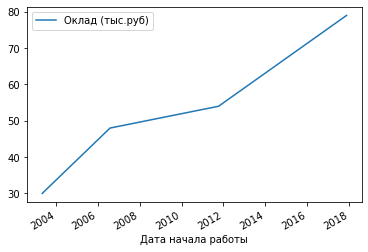

In [60]:
# Отрисуем, как менялся оклад работника с UID=2 по годам
a[a['UID'] == 2].plot(x='Дата начала работы',y='Оклад (тыс.руб)')

<AxesSubplot:xlabel='Дата начала работы'>

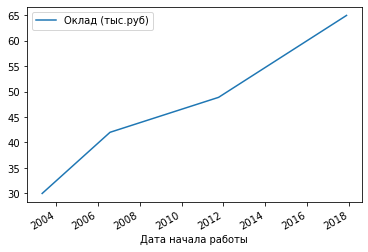

In [61]:
# сгладим график для работника с UID=2
# поменяйте параметр alpha, чтобы увидеть, как меняется график
a_tmp = a[a['UID'] == 2].ewm(alpha=0.5).mean()
a_tmp[['Оклад (тыс.руб)']].merge(a['Дата начала работы'], left_index=True, right_index=True).plot(x='Дата начала работы',y='Оклад (тыс.руб)')

In [62]:
# сгруппируем работников по UID, посмотрим среднее на двух последних местах работы по окладу
a_grouped = a.groupby('UID')
a_grouped['Оклад (тыс.руб)'].rolling(2).mean()

UID   
1    0     NaN
     1    30.5
2    2     NaN
     3    39.0
     4    51.0
     5    66.5
408  6     NaN
     7    26.5
501  8     NaN
Name: Оклад (тыс.руб), dtype: float64

In [63]:
# Вопрос 10
# 1) сгруппируйте данные по образованию и должности.
# Какая категория людей получает наибольший, а какая наименьший доход?
# 2) Закодируйте признак образование по принципу "выше уровень образования - больше цифра"
# Каково значение коэффициента корреляции Пирсона между уровнем образования и окладом, каков его знак?

In [70]:
gr = df.groupby(['Образование', 'Должность']).agg({'Оклад (тыс.руб)':'mean'})
gr


Оклад (тыс.руб)
Образование         Должность                             
Высшее              Заместитель директора               95
                    Инженер                             38
                    Менеджер                            27
                    Старший инженер                     45
К.т.н               Главный инженер                     58
Среднее             Оператор поддержки                  20
Среднее специальное Инженер                             35
                    Менеджер                            35

In [71]:
print('Образование и должность людей, получающих наименьший доход: ', gr['Оклад (тыс.руб)'].idxmin())
print('Образование и должность людей, получающих наибольший доход: ', gr['Оклад (тыс.руб)'].idxmax())

Образование и должность людей, получающих наименьший доход:  ('Среднее', 'Оператор поддержки')
Образование и должность людей, получающих наибольший доход:  ('Высшее', 'Заместитель директора')


In [72]:
edu = {'Среднее' : 1, 'Среднее специальное' : 2, 'Высшее' : 3, 'К.т.н' : 4}
df['Образование'] = [
    edu[c] for c in df['Образование']
]

In [82]:
corel = df['Образование'].corr(df['Оклад (тыс.руб)'])
sign = lambda s: 'положительная' if s > 0 else 'отрицательная'
corel


0.5239818268129481

In [83]:
print('Значение корреляции Пирсона равняется {}'.format(round(corel,2)))
print('Корреляция между образованием и уровнем дохода {}'.format(sign(corel)))

Значение корреляции Пирсона равняется 0.52
Корреляция между образованием и уровнем дохода положительная
